# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Clean-Data" data-toc-modified-id="Clean-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clean Data</a></div><div class="lev2 toc-item"><a href="#Investigate-if-any-missing-data-exists-or-Imputation-is-needed?" data-toc-modified-id="Investigate-if-any-missing-data-exists-or-Imputation-is-needed?-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Investigate if any missing data exists or Imputation is needed?</a></div><div class="lev2 toc-item"><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>One Hot Encoding</a></div><div class="lev2 toc-item"><a href="#Split-Train-and-Test-to-build-Preliminary-Tree" data-toc-modified-id="Split-Train-and-Test-to-build-Preliminary-Tree-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Split Train and Test to build Preliminary Tree</a></div><div class="lev2 toc-item"><a href="#Cost-Complexitiy-Pruning-Part-1:-Visualize-alpha" data-toc-modified-id="Cost-Complexitiy-Pruning-Part-1:-Visualize-alpha-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cost Complexitiy Pruning Part 1: Visualize alpha</a></div><div class="lev2 toc-item"><a href="#Use-Cross-Validation-to-Find-Alpha" data-toc-modified-id="Use-Cross-Validation-to-Find-Alpha-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Use Cross Validation to Find Alpha</a></div><div class="lev2 toc-item"><a href="#Change-Alpha-and-Run-CV" data-toc-modified-id="Change-Alpha-and-Run-CV-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Change Alpha and Run CV</a></div><div class="lev2 toc-item"><a href="#Predict-with-ideal-alpha" data-toc-modified-id="Predict-with-ideal-alpha-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Predict with ideal alpha</a></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [26]:
# Kaggle Heart Diesease data
df = pd.read_csv("data/heart.csv")

# Clean Data

## Investigate if any missing data exists or Imputation is needed?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
X, y = df.drop('target', axis=1), df['target']

## One Hot Encoding

In [25]:
for col in df.columns:
    if df[col].nunique() < 10 and sorted(df[col].unique())!=[0,1]:
        print("One-Hot-Encoding is required:")
        print(col)
        print(sorted(df[col].unique()))

cp
[0, 1, 2, 3]
restecg
[0, 1, 2]
slope
[0, 1, 2]
ca
[0, 1, 2, 3, 4]
thal
[0, 1, 2, 3]


Four variables need one-hot-encoding

In [33]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [34]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


## Split Train and Test to build Preliminary Tree

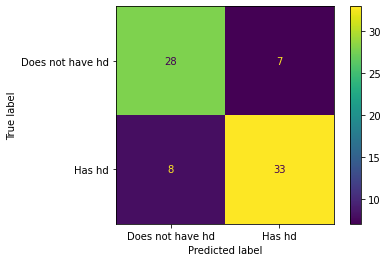

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_df = clf_dt.fit(X_train, y_train)
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have hd', "Has hd"])

## Cost Complexitiy Pruning Part 1: Visualize alpha

In [46]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# skip the last one?
ccp_alphas = ccp_alphas[:-1]
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

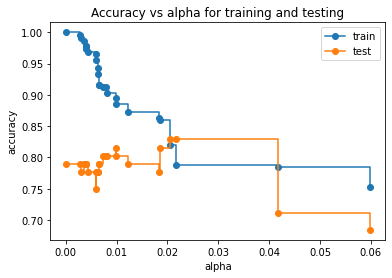

In [53]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Use Cross Validation to Find Alpha

<AxesSubplot:xlabel='tree'>

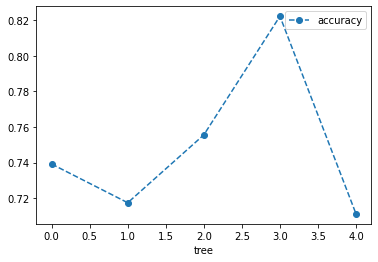

In [59]:
cv_num = 5
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)
scores = cross_val_score(clf_dt, X_train, y_train, cv=cv_num)
df = pd.DataFrame(data={'tree':range(cv_num), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

## Change Alpha and Run CV

The idea, is to run the TreeDecisionClassifier with different alphas, then look at different CV results, suppose, we do a CV=5 tests.

For each alpha, we will have 5 accy, then we can find their mean and std, draw them; x axis=alpha, y=axis=accy

<AxesSubplot:xlabel='alpha'>

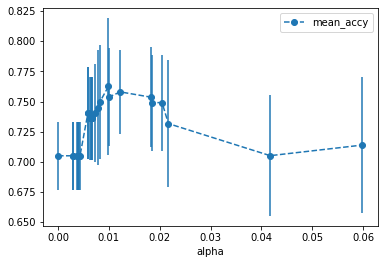

In [60]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accy', 'std'])
alpha_results.plot(x='alpha',
                  y='mean_accy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [63]:
alpha_results.head(2)

,alpha,mean_accy,std
0,0.000000,0.705024,0.027952
1,0.002894,0.705024,0.027952


In [68]:
ideal_alpha = alpha_results.loc[alpha_results['mean_accy']==alpha_results['mean_accy'].max(), 'alpha'].values[0]

## Predict with ideal alpha

In [69]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha=ideal_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

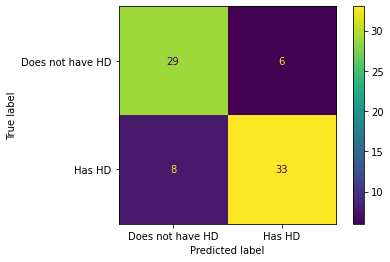

In [70]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels=["Does not have HD", "Has HD"])